<a href="https://colab.research.google.com/github/Beyoojn/predictclickads/blob/main/advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Clicked Ads Customer Classification

In [127]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## About Dataset

1. Unnamed: 0 =	ID of Customers

2. Daily Time Spent on Site =	Time spent by the user on a site in minutes

3. Age = Customer's age in terms of years

4. Area Income =	Average income of geographical area of consumer

5. Daily Internet Usage =	Average minutes in a day consumer is on the internet

6. Male =	Gender of the customer

7. Timestamp =	Time at which user clicked on an Ad or the closed window

8. Clicked on Ad =	Whether or not the customer clicked on an Ad	(Target Variable)

9. city =	City of the consumer

10. province =	Province of the consumer

11. category =	Category of the advertisement

## Mount to Google Drive

In [128]:
# Import the library to mount Google Drive
# from google.colab import drive
# Mount the Google Drive at /content/drive
# drive.mount('/content/drive')

### 1. Dataset Overview

In [129]:
import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clicked Ads Dataset.csv')
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Data Preparation

### Data Cleaning

Data cleaning involves identifying incomplete values in the table. Use the count() function to clean up your data. The count() function determines the number of values in each column. If a column contains null, the columns are not identical.

#### 1. Missing Values

In [130]:
# Checking any missing values in every column
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [131]:
# Drop nan values in every column
df = df.dropna()
df.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

### Duplicated Data

In [132]:
# Checking any duplicated data in every column
df.duplicated().any()

False

#### 3. Change Data Type

In [133]:
# Change data type "Timestamp" to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Make new column from "Tiemstamp" to get the hour data
df['hour'] = df['Timestamp'].dt.hour

# Make new column from "Timestamp" to get the month data
df['month'] = df['Timestamp'].dt.month

# Make new column from "Timestamp" to get better formating
df['timestamp'] = df['Timestamp'].dt.strftime('%m/%d/%Y')

### 4. Change Column Name

In [134]:
# Renaming "Unnamed: 0 " column
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [135]:
# Renaming "Male" column
df.rename(columns={'Male':'Gender'}, inplace=True)

### 5. Descriptive Statistics

In [136]:
# Creating list of numerical and categorical columns
nums = [col for col in df.columns if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col != 'ID' ]
cats = [col for col in df.columns if df[col].dtype == 'object']

In [137]:
# Descriptive stats for numerical features
df[nums].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,963.000000,963.000000,9.630000e+02,963.000000
mean,64.829200,36.049844,3.855628e+08,179.716106
std,15.892075,8.764154,9.380390e+07,43.867289
min,32.600000,19.000000,9.797550e+07,104.780000
25%,50.600000,29.000000,3.296658e+08,138.615000
50%,68.010000,35.000000,3.991039e+08,182.200000
75%,78.365000,42.000000,4.591870e+08,218.550000
max,91.430000,61.000000,5.563936e+08,267.010000


In [138]:
# Descriptive stats for categorical features
df[cats].describe()

,Gender,Clicked on Ad,city,province,category,timestamp
count,963,963,963,963,963,963
unique,2,2,30,16,10,202
top,Perempuan,Yes,Bandung,Daerah Khusus Ibukota Jakarta,Otomotif,02/14/2016
freq,502,485,64,244,108,12


In [139]:
result = []
for col in df.columns:
    result.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,ID,int64,0,0.0,963,"[0, 1, 2, 3, 4]"
1,Daily Time Spent on Site,float64,0,0.0,872,"[68.95, 80.23, 69.47, 74.15, 68.37]"
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23]"
3,Area Income,float64,0,0.0,963,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,0,0.0,930,"[256.09, 193.77, 236.5, 245.89, 225.58]"
5,Gender,object,0,0.0,2,"[Perempuan, Laki-Laki]"
6,Timestamp,datetime64[ns],0,0.0,960,"[2016-03-27 00:53:00, 2016-04-04 01:39:00, 201..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


## Univariate analysis

### 1. Numerical Features

C:\Users\User\AppData\Local\Temp\ipykernel_50664\986157660.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
C:\Users\User\AppData\Local\Temp\ipykernel_50664\986157660.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
C:\Users\User\AppData\Local\Temp\ipykernel_50664\986157660.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

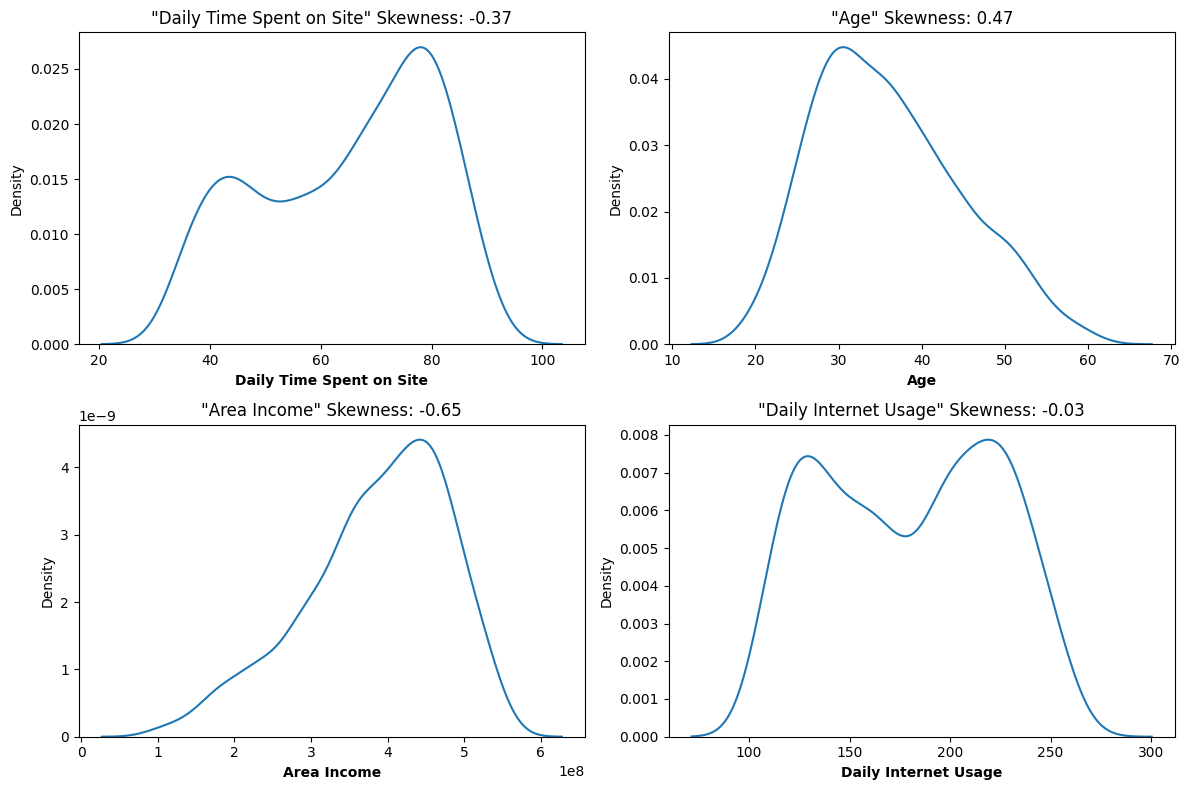

In [140]:
skewness = df[nums].skew()

plt.figure(figsize = (12,8))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'"{nums[i]}"'+f' Skewness: {round(skewness[i], 2)}')
    plt.tight_layout()

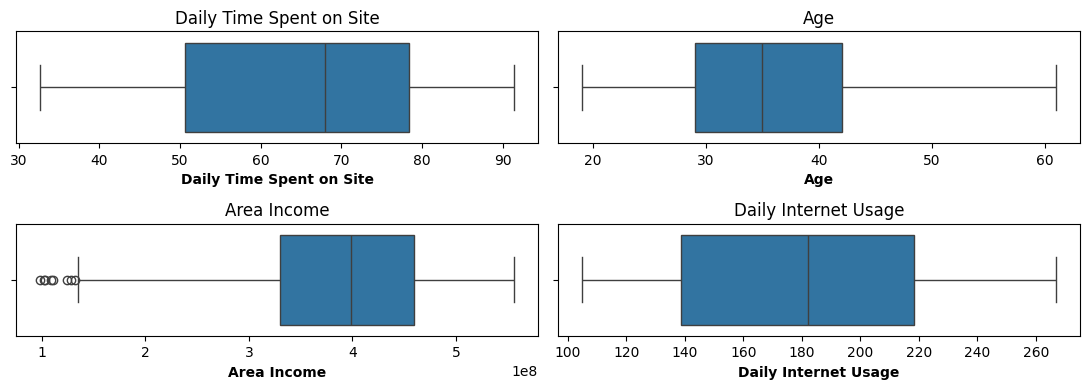

In [141]:
plt.figure(figsize=(11, 4))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = df[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

Summary:
1. "Area Income" is the only feature with a slight skew (left-skewed).
2. "Daily Internet Usage" is nearly uniform distributed.
3. While "Age" and "Daily Time Spent on Site" is nearly normally distributed.

### 2. Categorical Features

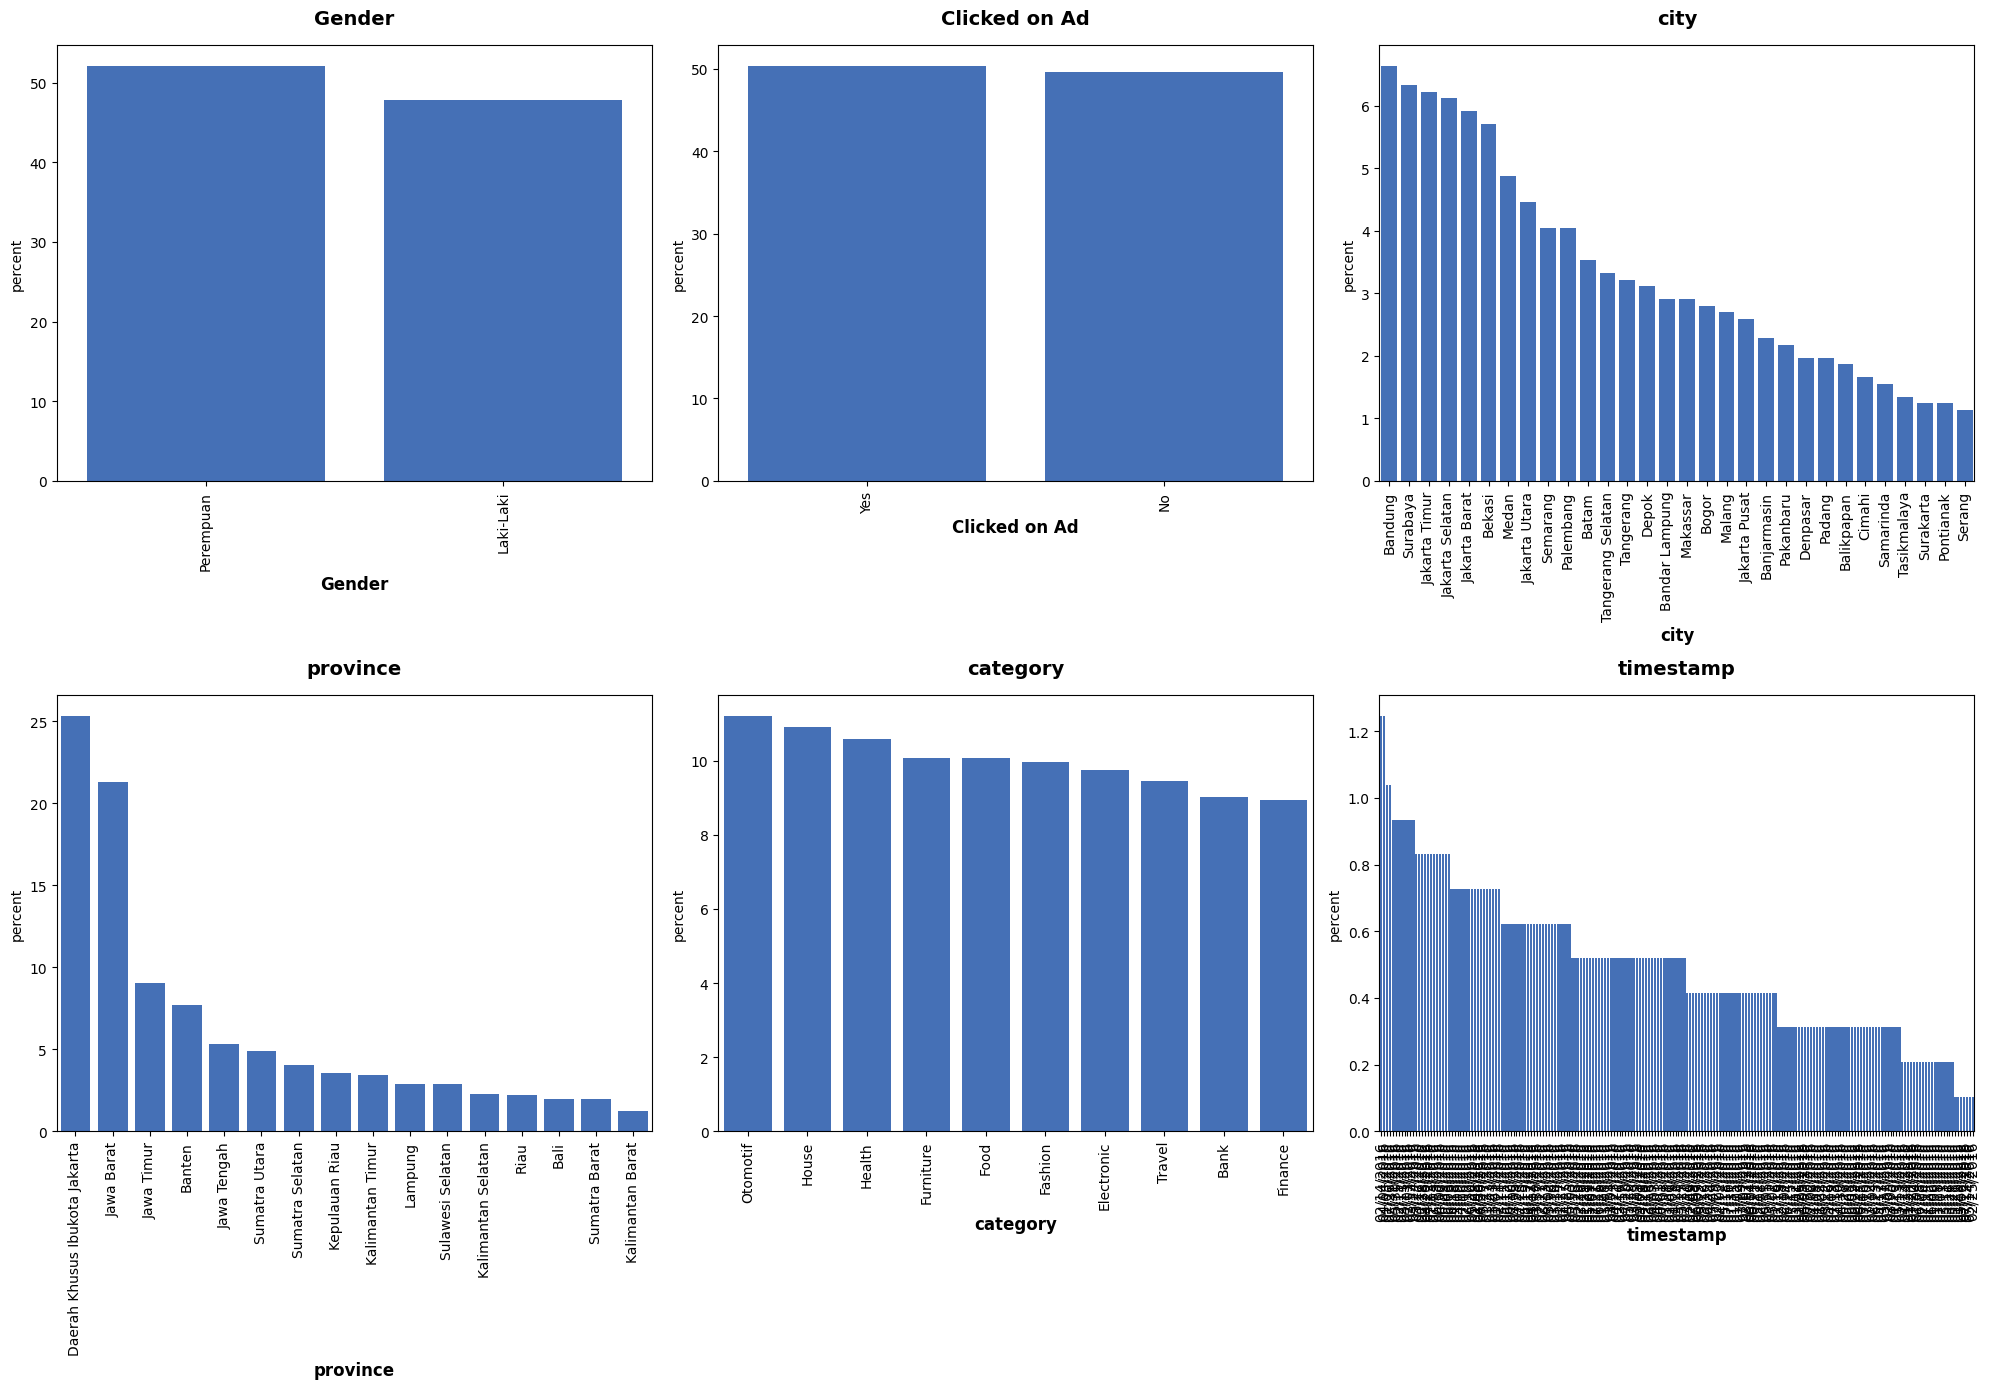

In [142]:
plt.figure(figsize=(20,14))
for i in range(len(cats)):
    order = df[cats[i]].value_counts().index
    plt.subplot(2, 3, i+1)
    if len(df[cats[i]].unique()) > 3:
      sns.countplot(x = df[cats[i]], data = df, order=order, color = '#326cc9', stat='percent')
    else:
      sns.countplot(x = df[cats[i]], data = df, order=order, color = '#326cc9', stat='percent')
    plt.xticks(rotation=90)
    plt.xlabel(cats[i], fontsize=12, fontweight = 'bold')
    plt.title(f'{cats[i]}', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()

Summary
1. "Gender" has an almost equal distribution of male and female.
2. "Clicked on Ad" has equal distribution of No and Yes.
3. "Province" has 2 somewhat dominant values: DKI Jakarta and Jawa Barat.
4. "Category" is almost equally distributed among the all the values.

## Bivariate Analysis

### 1. Numerical Features

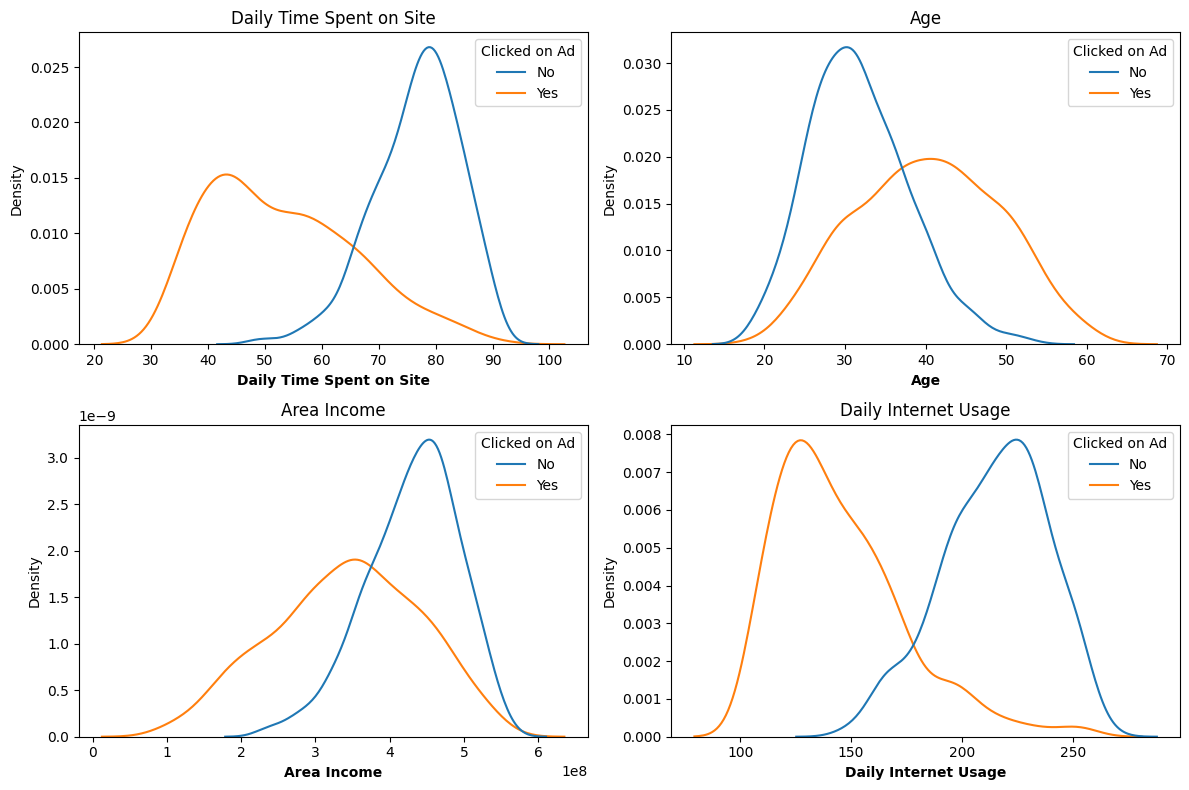

In [143]:
plt.figure(figsize = (12,8))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=nums[i], hue='Clicked on Ad', data=df)
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

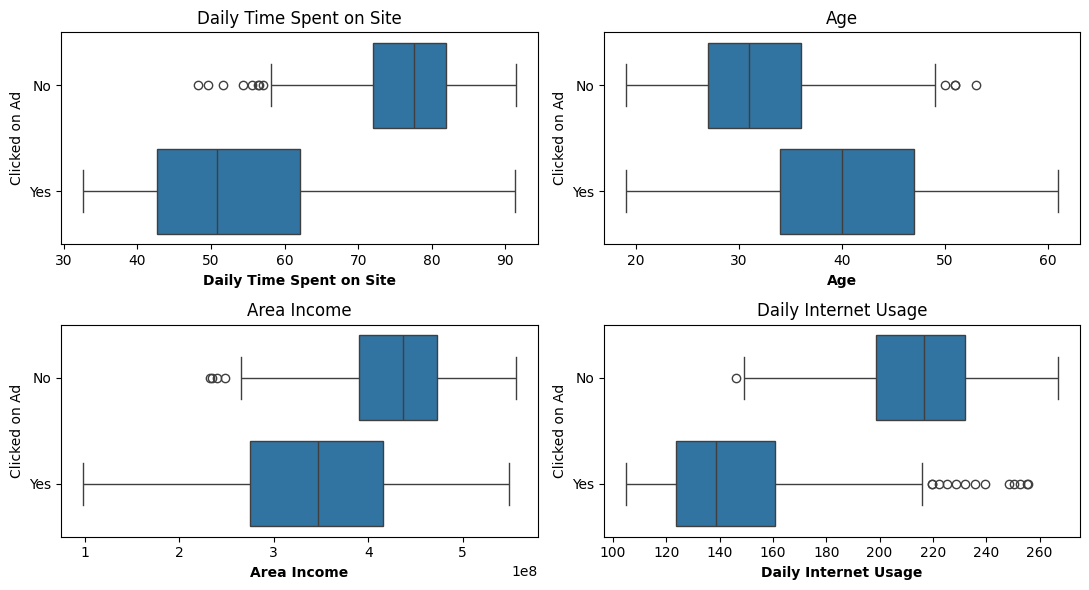

In [144]:
plt.figure(figsize=(11, 6))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = nums[i], y='Clicked on Ad', data=df)
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

Summary
1. The more time is spent on site by the customer the less likely they will click on an ad.
2. The average age of customers that clikced on an ad is 40, while the average for those that didn't is 31.
3. The average area income of customers that clicked on an ad is considerably lower than those that didn't.
4. Similar to time spent, the more the daily internet usage is, the less likely the customer will click on an ad.

### 2. Categorical Features

In [145]:
cats1

['Gender', 'city', 'province', 'category']

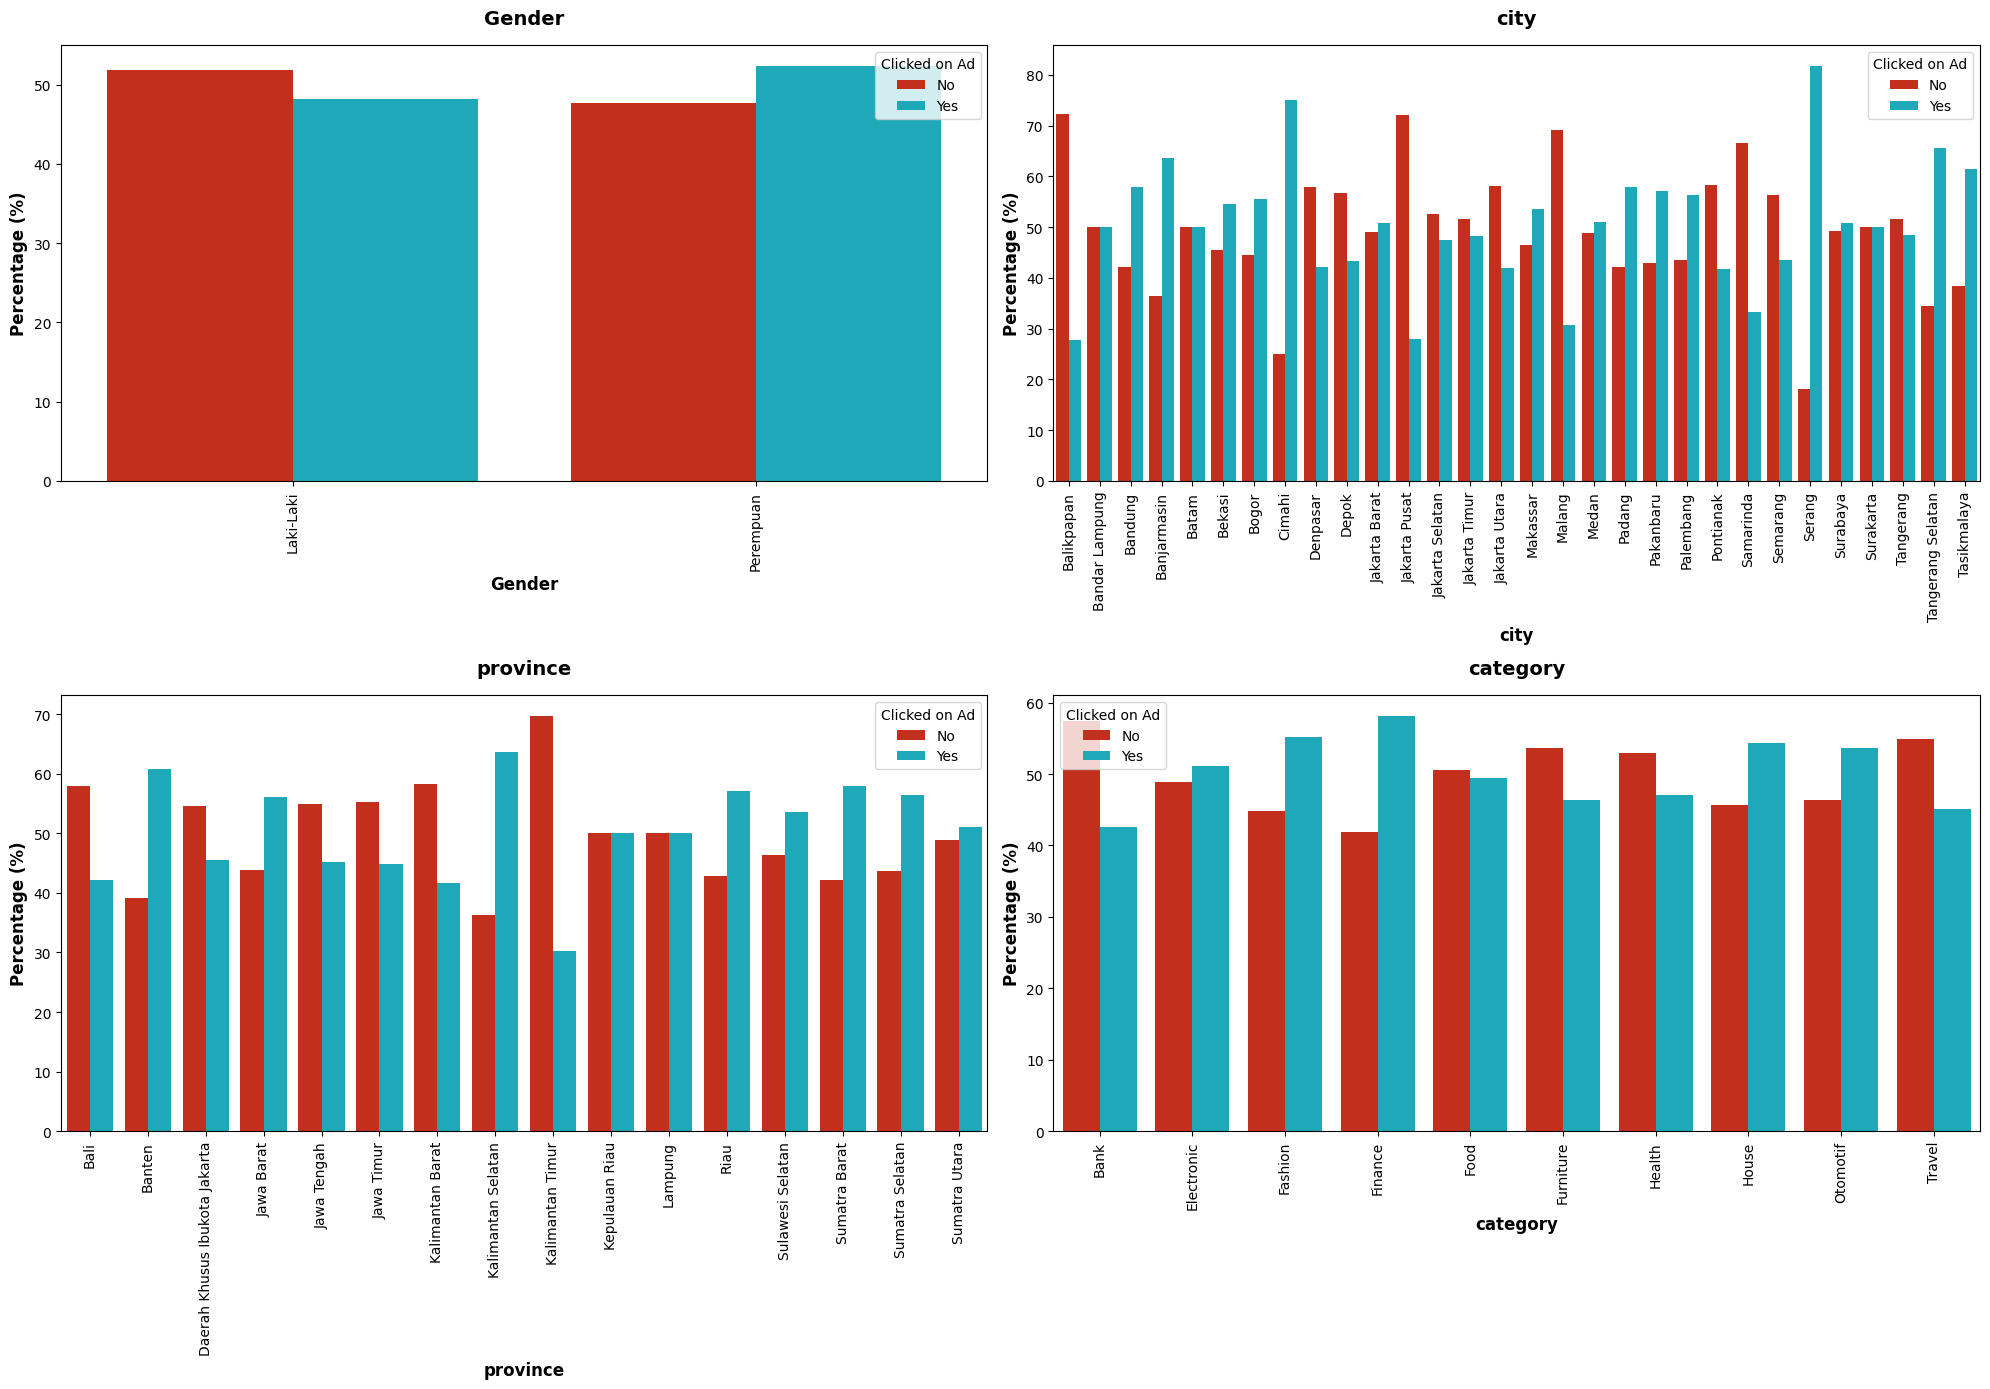

In [146]:
cats1=cats.copy()
cats1.remove('Clicked on Ad')
cats1.remove('timestamp')
df_temp = df.copy()
plt.figure(figsize=(20,14))
for i in range(len(cats1)):
    df_total = df_temp.groupby(cats1[i])['ID'].count().reset_index().rename(columns={'ID':'total'})
    df_subtotal = df_temp.groupby([cats1[i], 'Clicked on Ad'])['ID'].count().reset_index().rename(columns={'ID':'subtotal'})
    dfm = df_subtotal.merge(df_total, on=cats1[i])
    dfm['Percentage'] = round(dfm['subtotal']/dfm['total']*100, 2)

    plt.subplot(2, 2, i+1)
    sns.barplot(x = cats1[i], y='Percentage', data = dfm, palette = ['#de1a00', '#06bdd1'], hue='Clicked on Ad')
    plt.xticks(rotation=90)
    plt.xlabel(cats1[i], fontsize=12, fontweight = 'bold')
    plt.ylabel('Percentage (%)', fontsize=12, fontweight = 'bold')
    plt.title(f'{cats1[i]}', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()

Summary
1. Females clicked on an ad slightly more than males overall.
2. The city with the highest click rate is Serang with 81%, while the city with the lowest is Jakarta Pusat with 26%.
3. The top 3 provinces with the highest click rates are Kalimantan Selatan, Banten, Sumatra Barat.
4. Ad categories' click rates are pretty equal with none below 40% and none above 60%.

## Age vs. Daily Internet Usage

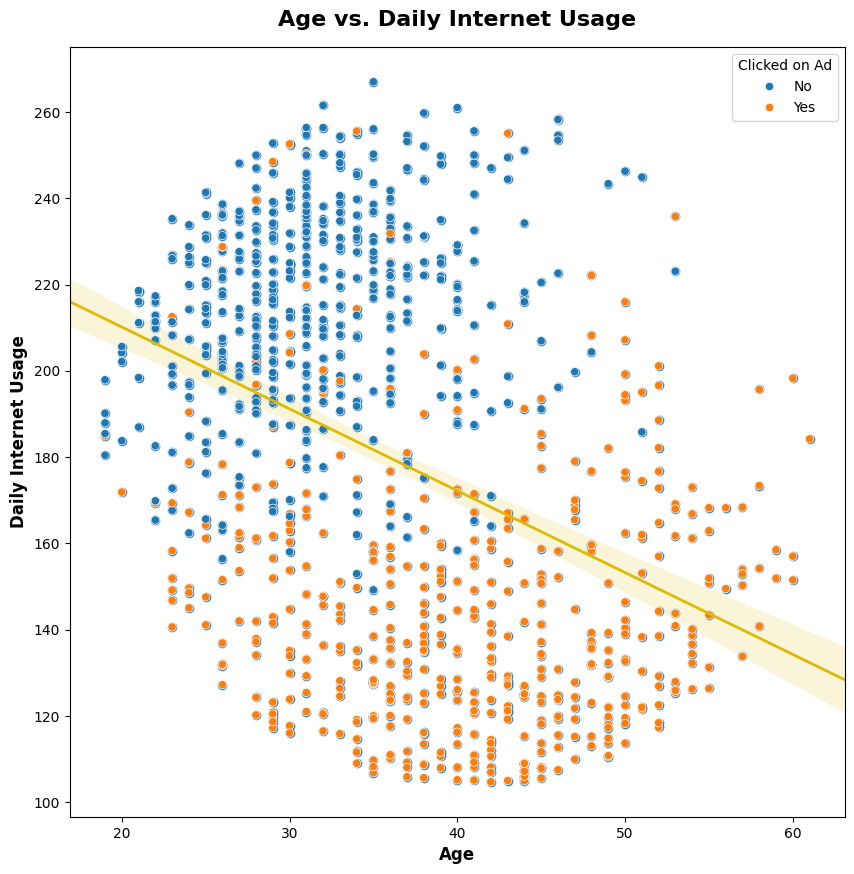

In [147]:
plt.figure(figsize=(10,10))
sns.regplot(data=df, x="Age", y="Daily Internet Usage", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Age', y = 'Daily Internet Usage', data = df, hue='Clicked on Ad')
plt.ylabel('Daily Internet Usage', fontsize=12, fontweight = 'bold')
plt.xlabel('Age', fontsize=12, fontweight = 'bold')
plt.title('Age vs. Daily Internet Usage', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

Summary <br>
Age is slightly negatively correlated with "Daily Internet Usage". Older customers spend less time on the internet on average compered to younger customers.

# Age vs. Daily Time Spent on Site

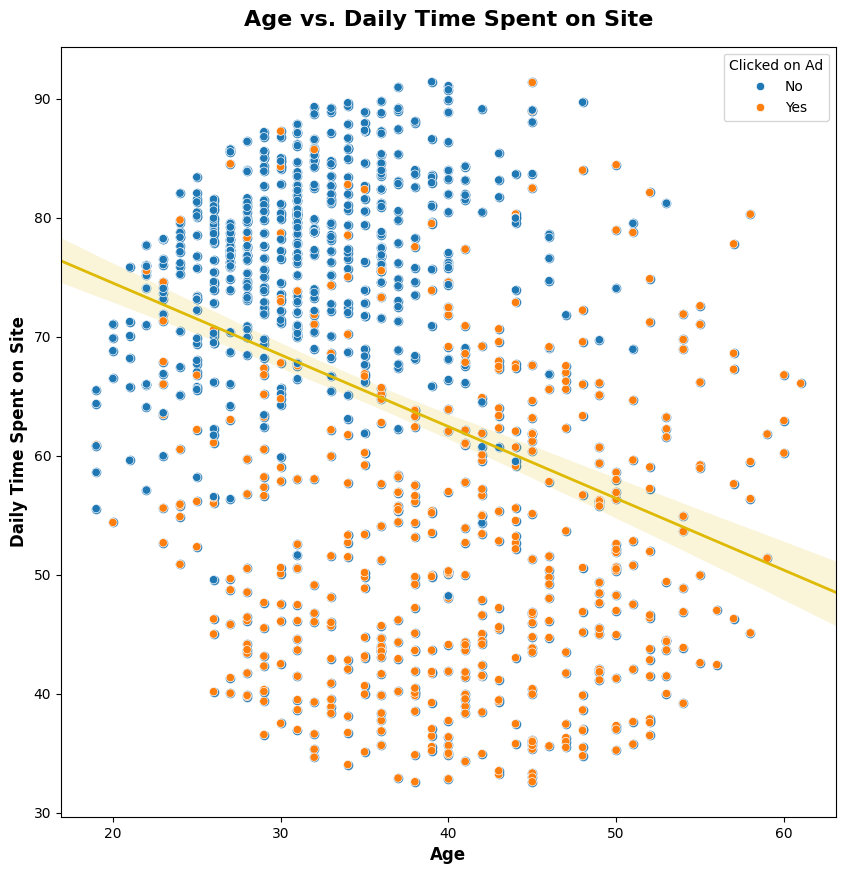

In [148]:
plt.figure(figsize=(10,10))
sns.regplot(data=df, x="Age", y="Daily Time Spent on Site", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Age', y = 'Daily Time Spent on Site', data = df, hue='Clicked on Ad')
plt.ylabel('Daily Time Spent on Site', fontsize=12, fontweight = 'bold')
plt.xlabel('Age', fontsize=12, fontweight = 'bold')
plt.title('Age vs. Daily Time Spent on Site', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

Summary <br>
Same as with "Daily Intert Usage, Age is slightly negatively correlated with "Daily Time Spent on Site".

# Daily Internet Usage vs. Daily Time Spent on Site

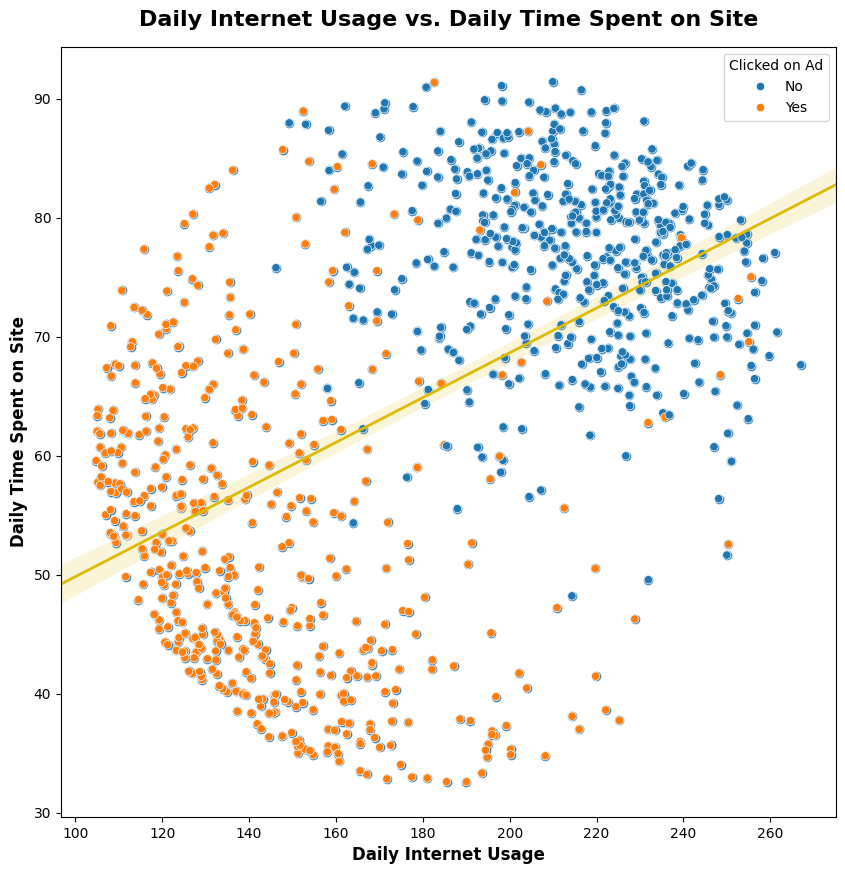

In [149]:
plt.figure(figsize=(10,10))
sns.regplot(data=df, x="Daily Internet Usage", y="Daily Time Spent on Site", truncate=False, line_kws={"linewidth": 2, 'color': '#deba04'})
sns.scatterplot(x = 'Daily Internet Usage', y = 'Daily Time Spent on Site', data = df, hue='Clicked on Ad')
plt.ylabel('Daily Time Spent on Site', fontsize=12, fontweight = 'bold')
plt.xlabel('Daily Internet Usage', fontsize=12, fontweight = 'bold')
plt.title('Daily Internet Usage vs. Daily Time Spent on Site', fontsize=16, fontweight = 'bold', pad = 15)

plt.show()

Summary <br>
Internet usage is positively correlated with time spent on site. As can be seen from the above chart, there is a quite clear separation between two clusters of data. One cluster is less active and the other more so. Less active customers have a higher tendency to click on an ad compared to more active customers.

## Multivariate Analysis

### Correlation Heatmap of Numerical Features

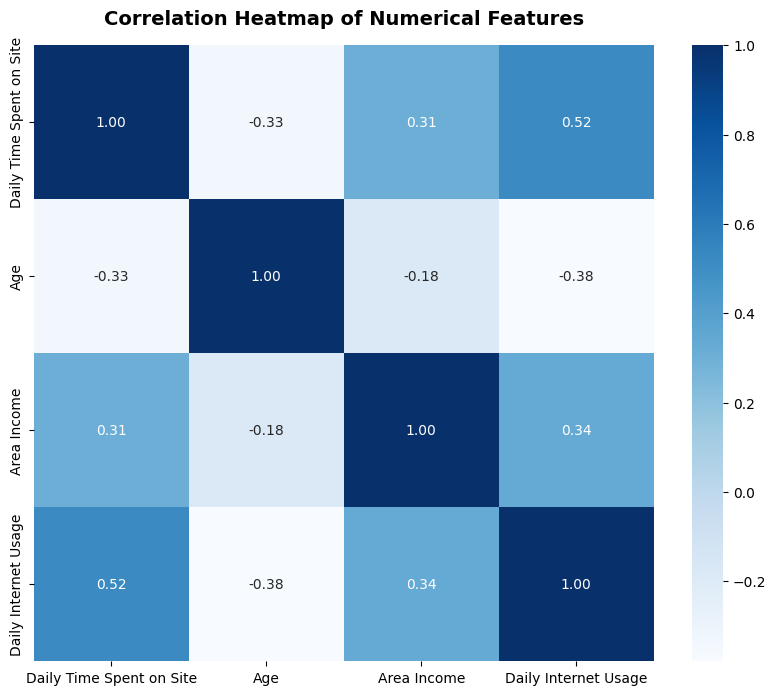

In [150]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold', pad=15)
plt.show()

### Numerical Features' Correlaction With Target

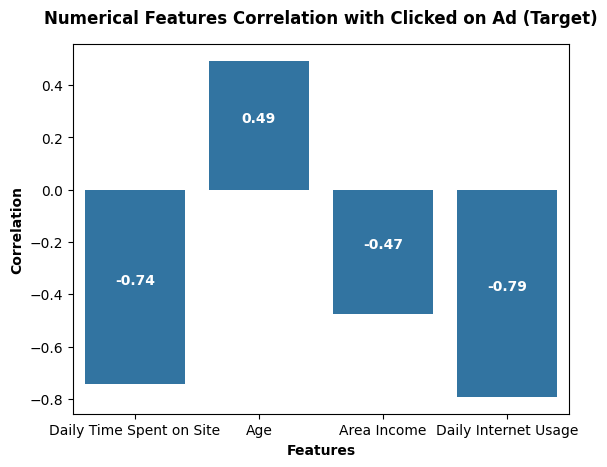

In [151]:
correlation = []
df_pb = df.copy()
df_pb['Clicked on Ad'] = np.where(df_pb['Clicked on Ad'] == 'Yes', 1, 0)
df_pb.dropna(inplace=True)
for i in range(len(nums)):
  corr, p = stats.pointbiserialr(df_pb['Clicked on Ad'], df_pb[nums[i]])
  vals = [nums[i], corr]
  correlation.append(vals)

df_corr = pd.DataFrame(data = correlation, columns=['Features', 'Correlation'])
bar = sns.barplot(x='Features', y='Correlation', data=df_corr)
plt.ylabel('Correlation', fontsize=10, fontweight = 'bold')
plt.xlabel('Features', fontsize=10, fontweight = 'bold')
plt.title('Numerical Features Correlation with Clicked on Ad (Target)', fontsize=12, fontweight = 'bold', pad = 15)

for i in bar.patches:
  height = i.get_height()
  width = i.get_width()
  x = i.get_x()
  y = i.get_y()
  bar.annotate(f'{round(height, 2)}', (x + width/2, y + (height/2)), ha='center', va='bottom', color = 'white', fontweight = 'bold')

plt.show()

### Categorical Features' Correlation (Cremaer's V)

In [152]:
def cramers_v(var1, var2):
    data = pd.crosstab(var1, var2).values
    chi_2 = stats.chi2_contingency(data)[0]
    n = data.sum()
    phi_2 = chi_2 / n
    r, k = data.shape
    return np.sqrt(phi_2 / min((k-1), (r-1)))

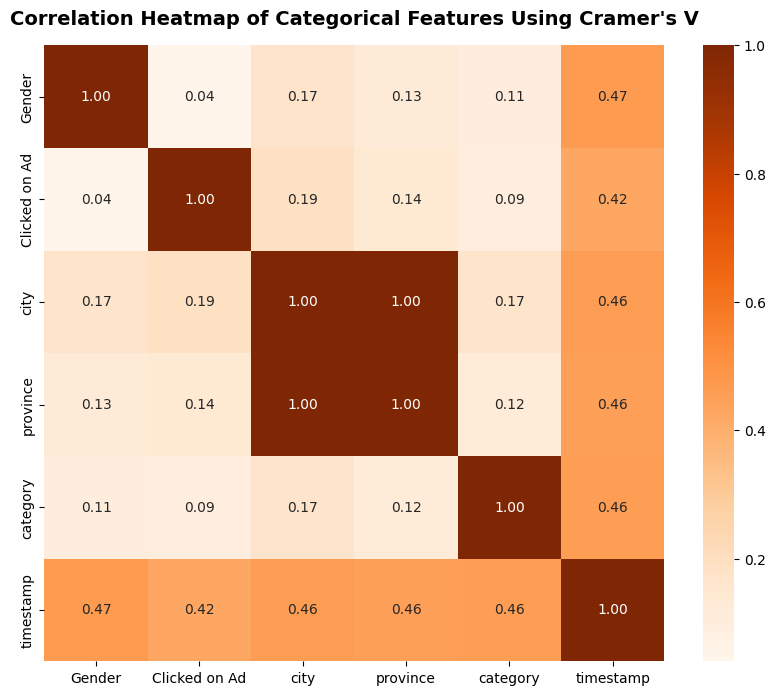

In [153]:
crv=[]
for i in range(len(cats)):
  row=[]
  for j in range(len(cats)):
    val = cramers_v(df[cats[i]], df[cats[j]])
    row.append(val)
  crv.append(row)
df_crv = pd.DataFrame(data=crv, columns=cats, index=cats)
df_crv

plt.figure(figsize=(10, 8))

sns.heatmap(df_crv, cmap='Oranges', annot=True, fmt='.2f')
plt.title("Correlation Heatmap of Categorical Features Using Cramer's V", fontsize=14, fontweight='bold', pad=15)
plt.show()

**Summary**

**Numerical Correlation** <br>
- **Daily Time Spent on Site and Daily Internet Usage** (0.52): <br>These two variables have a relatively strong positive correlation. This means that as people use the internet more, they tend to spend more time on the site on a daily basis. This could indicate that the website is engaging and users spend more time using it while online.

- **Daily Time Spent on Site and Age** (-0.33): <br>There is a moderate negative correlation between age and the time spent on the site. Older users tend to spend less time on the site. This could suggest that younger individuals may be more active on the site.

- **Daily Time Spent on Site and Area Income** (0.31): <br>There is a moderate positive correlation between daily time spent on the site and area income. This could mean that people with higher area income levels spend more time on the site, although the correlation is not very strong.

- **Age and Daily Internet Usage** (-0.37): <br>There is a moderate negative correlation between age and daily internet usage. Older individuals tend to use the internet less on a daily basis. This might be because younger individuals are more likely to be digitally active.

- **Age and Area Income** (-0.18): <br>There is a weak negative correlation between age and area income. This suggests that older individuals tend to have slightly lower area income, but the correlation is not strong at all.

- **Area Income and Daily Internet Usage** (0.34): <br>There is a moderate positive correlation between area income and daily internet usage. People with higher area incomes tend to use the internet more on a daily basis. This could be because they have better access to technology and higher-speed internet connections.
****
**Categorical Correlations (Cramer's V):**

- **Gender and City** (0.17): <br>There is a moderate positive association between gender and city. This suggests that there may be some relationship between a user's gender and the city in which they are located. However, the association is not particularly strong.

- **Gender and Province** (0.12): <br>There is a moderate positive association between gender and province. This implies that a user's gender might be somewhat related to their province of residence, but again, the association is not very strong.

- **Gender and Category** (0.11): <br>There is a moderate positive association between gender and category. This indicates that a user's gender might have some influence on the category they are interested in, but the association is not very strong.

- **City and Province** (1.0): <br>The perfect correlation coefficient of 1 indicates that city and province are perfectly associated. This is likely due to the dataset structure and may not provide meaningful information about the relationship between these variables.

- **City and Category** (0.17): <br>There is a moderate positive association between city and category. This suggests that a user's city may be related to the category they are interested in, but the association is not very strong.

- **Province and Category** (0.12): <br>There is a moderate positive association between province and category. This implies that the province of a user may have some influence on the category they are interested in, although the association is not very strong.
****
**Correlations with Target Variable:**

- **Gender and Clicked on Ad** (0.03): <br>There is a very weak positive association between gender and whether a user clicked on the ad.

- **Clicked on Ad and City** (0.19): <br>There is a moderate positive association between whether a user clicked on the ad and their city. This suggests that the city of the user may be somewhat related to their likelihood of clicking on the ad.

- **Clicked on Ad and Province** (0.13): <br>There is a moderate positive association between whether a user clicked on the ad and their province. This implies that a user's province might have some influence on their likelihood of clicking on the ad.

- **Clicked on Ad and Category** (0.08): <br>There is a very weak positive association between whether a user clicked on the ad and the category.

- **Daily Time Spent on Site** (-0.74): <br>The negative correlation coefficient of -0.74 indicates a strong negative relationship between "Daily Time Spent on Site" and the likelihood of a user clicking on the ad. This suggests that as users spend more time on the site, they are less likely to click on the ad. This could mean that users who spend a lot of time on the site might be more engaged with the content and less likely to click on ads.

- **Age** (0.49): <br>The positive correlation coefficient of 0.49 suggests a moderate positive relationship between a user's age and the likelihood of clicking on the ad. In other words, older individuals are more likely to click on the ad.

- **Area Income** (-0.47): <br>The negative correlation coefficient of -0.47 indicates a moderate negative relationship between "Area Income" and the likelihood of clicking on the ad. Users in areas with lower income levels are more likely to click on the ad.

- **Daily Internet Usage** (-0.79): <br>The negative correlation coefficient of -0.79 suggests a strong negative relationship between "Daily Internet Usage" and the likelihood of clicking on the ad. Users who spend more time on the internet are less likely to click on the ad. This could imply that users who are more active internet users might be less responsive to online advertisements.

# Data Cleaning & Preprocessing

In [154]:
df1 = df.copy()

### 1. Handling Outliers

In [155]:
# Trimming outliers using the IQR method
print(f'Number of rows prior to filtering: {len(df1)}')

q1 = df1['Area Income'].quantile(0.25)
q3 = df1['Area Income'].quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
df1 = df1[(df1['Area Income']>=low)&(df1['Area Income']<=upper)]

print(f'Number of rows after filtering: {len(df1)}')

Number of rows prior to filtering: 963
Number of rows after filtering: 955


### 2. Checking Boxplot

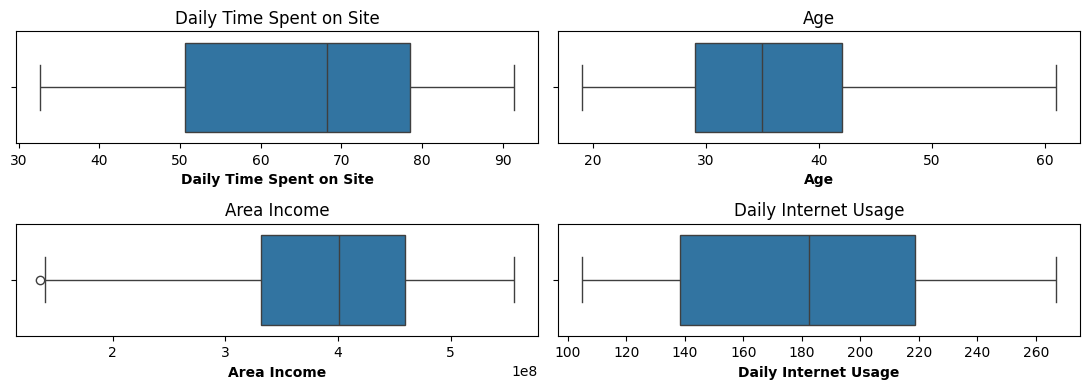

In [156]:
plt.figure(figsize=(11, 4))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = df1[nums[i]])
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

### 3. Feature Encoding

In [157]:
df_enc = df1.copy()
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        955 non-null    int64         
 1   Daily Time Spent on Site  955 non-null    float64       
 2   Age                       955 non-null    int64         
 3   Area Income               955 non-null    float64       
 4   Daily Internet Usage      955 non-null    float64       
 5   Gender                    955 non-null    object        
 6   Timestamp                 955 non-null    datetime64[ns]
 7   Clicked on Ad             955 non-null    object        
 8   city                      955 non-null    object        
 9   province                  955 non-null    object        
 10  category                  955 non-null    object        
 11  hour                      955 non-null    int32         
 12  month                     9

### 3. Label Encoding

In [158]:
df_enc['Gender'].value_counts()

Gender
Perempuan    500
Laki-Laki    455
Name: count, dtype: int64

In [159]:
# Label encoding Gender feature
df_enc['Gender'] = np.where(df_enc['Gender'] == 'Laki-Laki', 1, 0)
df_enc['Gender'].value_counts()

Gender
0    500
1    455
Name: count, dtype: int64

In [160]:
df_enc['Clicked on Ad'].value_counts()

Clicked on Ad
No     478
Yes    477
Name: count, dtype: int64

In [161]:
# Label encoding Target feature
df_enc['Clicked on Ad'] = np.where(df_enc['Clicked on Ad'] == 'Yes', 1, 0)
df_enc['Clicked on Ad'].value_counts()

Clicked on Ad
0    478
1    477
Name: count, dtype: int64

### 4. One-Hot Encoding

In [162]:
print(f"Unique values of category: {df_enc['category'].nunique()}")
print(f"Unique values of category: {df_enc['city'].nunique()}")
print(f"Unique values of category: {df_enc['province'].nunique()}")

Unique values of category: 10
Unique values of category: 30
Unique values of category: 16


In [163]:
pd.set_option('display.max_columns', None)

In [164]:
# One hot encoding
df_enc = pd.get_dummies(df_enc, columns=['category'])
df_enc.head(3)

,ID,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,hour,month,timestamp,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,0,3,03/27/2016,False,False,False,False,False,True,False,False,False,False
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,1,4,04/04/2016,False,False,False,False,True,False,False,False,False,False
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,20,3,03/13/2016,False,True,False,False,False,False,False,False,False,False


### 5. Feature Selection 

In [165]:
df_clean = df_enc.select_dtypes(['float64', 'int64','uint8', 'int32'])
df_clean = df_clean.drop(columns=['ID'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  955 non-null    float64
 1   Age                       955 non-null    int64  
 2   Area Income               955 non-null    float64
 3   Daily Internet Usage      955 non-null    float64
 4   Gender                    955 non-null    int32  
 5   Clicked on Ad             955 non-null    int32  
 6   hour                      955 non-null    int32  
 7   month                     955 non-null    int32  
dtypes: float64(3), int32(4), int64(1)
memory usage: 52.2 KB


### 6. Splitting Dataset

An experiment will be conducted in the modeling section where each ML model will be implemented using 2 different data, one normalized data and the other non-normalized data. Therefore the dataset will be cloned into 2 identical copies where one will be normalized and the other won't be.

In [166]:
set(df_clean)

{'Age',
 'Area Income',
 'Clicked on Ad',
 'Daily Internet Usage',
 'Daily Time Spent on Site',
 'Gender',
 'hour',
 'month'}

In [167]:
X = df_clean.drop(columns='Clicked on Ad')
y = df_clean['Clicked on Ad'].values
X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2 = y.copy()

**NOTE :**
- **<code>X1</code> and <code>y1</code>: Data without normalization/standardization**
- **<code>X2</code> and <code>y2</code>: Data that will be normalized/standardized**

**Data will be split in 75:25 ratio, 75% train set and 25% test set**

In [169]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

print(f'Train set size: {X1_train.shape[0]}')
print(f'Test set size: {X1_test.shape[0]}')

Train set size: 716
Test set size: 239


### 7. Feautre Scaling

**Feature scaling will only be applied to <code>X2_train</code> and <code>X2_test</code>**

In [170]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2_train_scaled = X2_train.copy()

for n in nums:
  scaler = ss.fit(X2_train_scaled[[n]])
  X2_train_scaled[n] = scaler.transform(X2_train_scaled[[n]])
  X2_test[n] = scaler.transform(X2_test[[n]])


In [171]:
X2_train_scaled[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,716.0,-4.961891e-18,1.000699,-2.007222,-0.903587,0.222771,0.841747,1.651536
Age,716.0,-6.202363e-17,1.000699,-1.894182,-0.778674,-0.109370,0.671486,2.790951
Area Income,716.0,2.828278e-16,1.000699,-2.796791,-0.603257,0.148290,0.800423,1.856545
Daily Internet Usage,716.0,6.251982e-16,1.000699,-1.738950,-0.912242,0.032112,0.877887,2.021776


**As can be seen above, all of the numerical features have 0 <code>mean</code> and 1 <code>std</code>. This means that the standardization was succesful.**

## Modeling

### Before Normalization / Standarization

### Helper Function

In [172]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
import time
def eval_classification1(model):
    y_pred = model.predict(X1_test)
    y_pred_train = model.predict(X1_train)
    y_pred_proba = model.predict_proba(X1_test)
    y_pred_proba_train = model.predict_proba(X1_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y1_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y1_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y1_test, y_pred, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y1_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y1_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y1_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y1_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y1_train, y_pred_proba_train[:, 1]))

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model, X=X1_train, y=y1_train, cv=cv, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('Accuracy (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe1(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models1={}
    fit_time1 = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(X1_train, y1_train)
        end = time.time()
        fit_time1.append(round(end-start, 2))
        #Append model
        fitted_models1[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models1, fit_time1

def confusion1(model):
    y_pred_proba = model.predict_proba(X1_test)
    y_predict = model.predict(X1_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y1_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y1_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y1_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y1_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y1_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y1_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

#### 1. Vanilla Models 

##### 1.1 Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression(random_state=123)
logreg1.fit(X1_train, y1_train)

eval_classification1(logreg1)

In [ ]:
confusion1(logreg1)

#### 1.2 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(random_state=123)
dt1.fit(X1_train, y1_train)

eval_classification1(dt1)

In [ ]:
confusion1(dt1)

#### 1.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=123)
rf1.fit(X1_train, y1_train)

eval_classification1(rf1)

In [ ]:
confusion1(rf1)

### After Hyperparameter Tunning

**As can be seen in the above section, overfitting exists in a few of the models tested. Hyperparameter tuning will be done to sort this issue.**

In [ ]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression1': Pipeline([('clf', LogisticRegression(random_state=123))]),
            'decisiontree1':Pipeline([('clf', DecisionTreeClassifier(random_state = 123))]),
            'randomforest1':Pipeline([('clf', RandomForestClassifier(random_state = 123))]),
            'knn1':Pipeline([('clf', KNeighborsClassifier())]),
            'gb1':Pipeline([('clf', GradientBoostingClassifier(random_state = 123))]),
            'xgboost1': Pipeline([('clf', XGBClassifier(nthread=6, tree_method='hist', random_state=123))])}

#Define Hyperparameters for each pipeline
hyperparameters_lr1 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt1 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf1 ={'clf__n_estimators': [50,60,75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn1 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb1 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb1 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1,3,5]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression1':hyperparameters_lr1,
                   'decisiontree1':hyperparameters_dt1,
                   'randomforest1':hyperparameters_rf1,
                   'knn1':hyperparameters_knn1,
                   'gb1':hyperparameters_gb1,
                   'xgboost1': hyperparameters_xgb1}

In [ ]:
logreg1_tuned = LogisticRegression(random_state=123, C = 0.004424242424242424, penalty = 'l2', solver = 'newton-cg')
logreg1_tuned.fit(X1_train, y1_train)

eval_classification1(logreg1_tuned)

In [ ]:
confusion1(logreg1_tuned)

### After Normalization / Standarization

**As can be seen in the above section, Overfitting has been significantly reduced.**

#### Helper Function

In [173]:
from sklearn.pipeline import Pipeline

def eval_classification2(model):
    y_pred = model.predict(X2_test)
    y_pred_train = model.predict(X2_train_scaled)
    y_pred_proba = model.predict_proba(X2_test)
    y_pred_proba_train = model.predict_proba(X2_train_scaled)

    model1 = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', model)
    ])

    print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y2_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y2_test, y_pred, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y2_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y2_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y2_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y2_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y2_train, y_pred_proba_train[:, 1]))

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model1, X=X2_train, y=y2_train, cv=cv, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('Accuracy (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe2(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models2={}
    fit_time2 = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(X2_train, y2_train)
        end = time.time()
        fit_time2.append(round(end-start, 2))
        #Append model
        fitted_models2[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models2, fit_time2

def confusion2(model):
    y_pred_proba = model.predict_proba(X2_test)
    y_predict = model.predict(X2_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y2_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y2_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y2_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y2_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y2_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y2_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

### After Hyperparameter Tuning

In [ ]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression2': Pipeline([('scaling', StandardScaler()), ('clf', LogisticRegression(random_state=123))]),
            'decisiontree2':Pipeline([('scaling', StandardScaler()), ('clf', DecisionTreeClassifier(random_state = 123))]),
            'randomforest2':Pipeline([('scaling', StandardScaler()), ('clf', RandomForestClassifier(random_state = 123))]),
            'knn2':Pipeline([('scaling', StandardScaler()), ('clf', KNeighborsClassifier())]),
            'gb2':Pipeline([('scaling', StandardScaler()), ('clf', GradientBoostingClassifier(random_state = 123))]),
            'xgboost2': Pipeline([('scaling', StandardScaler()), ('clf', XGBClassifier(nthread=6, tree_method='hist', random_state=123))])}

#Define Hyperparameters for each pipeline
hyperparameters_lr2 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt2 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf2 ={'clf__n_estimators': [50,60,75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn2 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb2 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb2 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1,3,5]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression2':hyperparameters_lr2,
                   'decisiontree2':hyperparameters_dt2,
                   'randomforest2':hyperparameters_rf2,
                   'knn2':hyperparameters_knn2,
                   'gb2':hyperparameters_gb2,
                   'xgboost2': hyperparameters_xgb2}